In [1]:
import os
import numpy as np
from numpy import newaxis
import pickle
from PIL import Image
from matplotlib.pyplot import imshow
import time
import torch
from torchvision import transforms, datasets
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from random import shuffle
import cv2
import time

In [2]:
parser = argparse.ArgumentParser(description='PyTorch Example')
parser.add_argument('--disable-cuda', action='store_true',
                    help='Disable CUDA')
parser.add_argument('--interval',metavar='N',default=100)


parser.add_argument('--resume', default='', type=str, metavar='PATH',
                    help='path to latest checkpoint (default: none)')
args = parser.parse_args(args=[])
args.cuda = not args.disable_cuda and torch.cuda.is_available()

In [3]:
def negativeThreshold(image):
    lpcount = 0.0
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            if image[r][c] > 127:
                lpcount+=1
                
    return lpcount/(256.*256.)


In [4]:
def transform_image(ip_img):
    
    #Rotate 90 Degrees Clockwise
    tr_img = cv2.transpose(ip_img)
    rotate_img_1 = cv2.flip(tr_img, +1)
    
    #Flip image vertically 
    rotate_img_2 = cv2.flip(tr_img, 0)
    
    #Rotate 180 degree flip
    rotate_img_3 = cv2.flip(tr_img, -1)
    
    
    
    return [tr_img,rotate_img_1,rotate_img_2,rotate_img_3]
    

In [26]:
# training_path ='data/train/'
# data_folder = [d for d in os.listdir(training_path) ]
# all_mask_files = []
# all_data=[]
# size=(128,128)
# lpthreshold = 0.15
# for i in range(len(data_folder)):
    
# #     flip = np.random.randint(3)
    
#     img_data_folder = [k for k in os.listdir(training_path+data_folder[i])]
#     img_files =[k for k in os.listdir(training_path+data_folder[i]+'/'+img_data_folder[1])]
#     masks_files = [k for k in os.listdir(training_path+data_folder[i]+'/'+img_data_folder[0])]
#     current_mask_files=[]
#     for j in range(len(masks_files)):
        
#         mask_img = cv2.imread(training_path+data_folder[i]+'/'+img_data_folder[0]+'/'+masks_files[j])
#         mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
#         mask_img = cv2.resize(mask_img, size,interpolation = cv2.INTER_AREA) 
        
#         mask_img = np.asarray(mask_img)
        
#         mask_img = mask_img /255.0
        

#         current_mask_files.append(mask_img)
        
#     current_mask_files = np.array(current_mask_files)
#     temp= np.max(current_mask_files,axis=0)
    
    
#     all_mask_files.append(temp)
    
#     for j in range(len(img_files)):
        
#         ip_img = cv2.imread(training_path+data_folder[i]+'/'+img_data_folder[1]+'/'+img_files[j])
#         ip_img = cv2.cvtColor(ip_img, cv2.COLOR_BGR2GRAY)
#         ip_img = cv2.resize(ip_img, size,interpolation = cv2.INTER_AREA)
#         all_data.append(ip_img/255.)
#         if negativeThreshold(ip_img) > lpthreshold:
#             ip_img = 255 - ip_img
#             augmented_img_ls = transform_image(ip_img)
#             augmneted_mask_img_ls = transform_image(all_mask_files[-1])    
#             for ele in augmented_img_ls:
#                 all_data.append(ele/255.0)
#             for ele in augmneted_mask_img_ls:
#                 all_mask_files.append(ele)
        
        

In [27]:
# print(len(all_mask_files))
# print(len(all_data))

1130
1130


In [5]:
testing_path ='data/test/'
data_folder = [d for d in os.listdir(testing_path) ]
lpthreshold = 0.15
test_data=[]
size=(128,128)
for i in range(len(data_folder)):
    
    img_data_folder = [k for k in os.listdir(testing_path+data_folder[i])]
    img_files =[k for k in os.listdir(testing_path+data_folder[i]+'/'+img_data_folder[0])]
    
    
    
    for j in range(len(img_files)):
        
        ip_img = Image.open(testing_path+data_folder[i]+'/'+img_data_folder[0]+'/'+img_files[j])
        ip_img = ip_img.resize(size,Image.BILINEAR)
        ip_img = ip_img.convert('L')
        ip_img = np.asarray(ip_img)
        
        
        
        test_data.append(ip_img)
        

In [6]:
# data_dict ={"all_data":all_data,"all_mask_files":all_mask_files}
# with open('all_images.pickle', 'wb') as handle:
#     pickle.dump(data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'all_data' is not defined

In [7]:
data_dict = pickle.load(open( "all_images.pickle", "rb" ) )

In [8]:
all_data,all_mask_files = data_dict["all_data"],data_dict["all_mask_files"]

In [9]:
import random
val_data_sampler =random.sample(range(len(all_data)), 130)

shuffle(val_data_sampler)
print(val_data_sampler)
print(len(val_data_sampler))

[679, 112, 550, 607, 576, 157, 835, 438, 876, 699, 991, 455, 784, 240, 361, 34, 977, 958, 565, 831, 733, 936, 1000, 716, 358, 997, 143, 77, 167, 981, 236, 574, 556, 674, 479, 50, 709, 525, 121, 678, 159, 471, 647, 1089, 271, 33, 58, 827, 807, 1097, 300, 228, 1024, 913, 424, 220, 142, 431, 87, 507, 332, 1032, 969, 19, 910, 588, 45, 303, 1098, 905, 395, 723, 20, 796, 156, 73, 829, 737, 11, 3, 982, 29, 380, 970, 257, 1086, 742, 843, 252, 8, 75, 198, 759, 205, 385, 1114, 128, 661, 624, 415, 151, 1005, 839, 1062, 813, 757, 794, 659, 313, 131, 419, 964, 875, 340, 78, 147, 992, 854, 604, 1009, 368, 912, 895, 251, 4, 238, 348, 599, 412, 584]
130


In [10]:
val_img,val_mask,training_img,training_mask=[],[],[],[]
print(len(all_data))
for i in range(len(all_data)):
    if i in val_data_sampler:
        val_img.append(all_data[i])
        val_mask.append(all_mask_files[i])
    else:
        training_img.append(all_data[i])
        training_mask.append(all_mask_files[i])

1130


In [11]:
print(len(training_img))
print(len(training_mask))
print(len(val_img))
print(len(val_mask)) 

1000
1000
130
130


In [47]:
#Segmentation Network
class SegNet(nn.Module):
    """Segnet network."""

    def __init__(self, input_nbr, label_nbr):
        """Init fields."""
        super(SegNet, self).__init__()

        self.input_nbr = input_nbr

        batchNorm_momentum = 0.1
        
        self.conv11 = nn.Conv2d(input_nbr, 64, kernel_size=3, padding=1)
        self.bn11 = nn.BatchNorm2d(64, momentum=batchNorm_momentum)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12 = nn.BatchNorm2d(64, momentum=batchNorm_momentum)

        self.conv21 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn21 = nn.BatchNorm2d(128, momentum=batchNorm_momentum)
        self.conv22 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22 = nn.BatchNorm2d(128, momentum=batchNorm_momentum)

        self.conv31 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn31 = nn.BatchNorm2d(256, momentum=batchNorm_momentum)
        self.conv32 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32 = nn.BatchNorm2d(256, momentum=batchNorm_momentum)
        self.conv33 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33 = nn.BatchNorm2d(256, momentum=batchNorm_momentum)

        self.conv41 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn41 = nn.BatchNorm2d(512, momentum=batchNorm_momentum)
        self.conv42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42 = nn.BatchNorm2d(512, momentum=batchNorm_momentum)
        self.conv43 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43 = nn.BatchNorm2d(512, momentum=batchNorm_momentum)

        self.conv51 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn51 = nn.BatchNorm2d(512, momentum=batchNorm_momentum)
        self.conv52 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn52 = nn.BatchNorm2d(512, momentum=batchNorm_momentum)
        self.conv53 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn53 = nn.BatchNorm2d(512, momentum=batchNorm_momentum)

        self.conv53d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn53d = nn.BatchNorm2d(512, momentum=batchNorm_momentum)
        self.conv52d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn52d = nn.BatchNorm2d(512, momentum=batchNorm_momentum)
        self.conv51d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn51d = nn.BatchNorm2d(512, momentum=batchNorm_momentum)

        self.conv43d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43d = nn.BatchNorm2d(512, momentum=batchNorm_momentum)
        self.conv42d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42d = nn.BatchNorm2d(512, momentum=batchNorm_momentum)
        self.conv41d = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.bn41d = nn.BatchNorm2d(256, momentum=batchNorm_momentum)

        self.conv33d = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33d = nn.BatchNorm2d(256, momentum=batchNorm_momentum)
        self.conv32d = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32d = nn.BatchNorm2d(256, momentum=batchNorm_momentum)
        self.conv31d = nn.Conv2d(256,  128, kernel_size=3, padding=1)
        self.bn31d = nn.BatchNorm2d(128, momentum=batchNorm_momentum)

        self.conv22d = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22d = nn.BatchNorm2d(128, momentum=batchNorm_momentum)
        self.conv21d = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn21d = nn.BatchNorm2d(64, momentum=batchNorm_momentum)

        self.conv12d = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12d = nn.BatchNorm2d(64, momentum=batchNorm_momentum)
        self.conv11d = nn.Conv2d(64, label_nbr, kernel_size=3, padding=1)

    def forward(self, x):
        
        """Forward method."""
        # Stage 1
#         print(x.shape)
        x11 = F.relu(self.bn11(self.conv11(x)))
        
        x12 = F.relu(self.bn12(self.conv12(x11)))
        x1p, id1 = F.max_pool2d(x12, kernel_size=2, stride=2, return_indices=True)
        size1 = x12.size()
        
        # Stage 2
        x21 = F.relu(self.bn21(self.conv21(x1p)))
        x22 = F.relu(self.bn22(self.conv22(x21)))
        x2p, id2 = F.max_pool2d(x22, kernel_size=2, stride=2, return_indices=True)
        size2 = x22.size()
        
        
        # Stage 3
        x31 = F.relu(self.bn31(self.conv31(x2p)))
        x32 = F.relu(self.bn32(self.conv32(x31)))
        x33 = F.relu(self.bn33(self.conv33(x32)))
        x3p, id3 = F.max_pool2d(x33, kernel_size=2, stride=2, return_indices=True)
        size3 = x33.size()

        # Stage 4
        x41 = F.relu(self.bn41(self.conv41(x3p)))
        x42 = F.relu(self.bn42(self.conv42(x41)))
        x43 = F.relu(self.bn43(self.conv43(x42)))
        x4p, id4 = F.max_pool2d(x43, kernel_size=2, stride=2, return_indices=True)
        size4 = x43.size()

        # Stage 5
        x51 = F.relu(self.bn51(self.conv51(x4p)))
        x52 = F.relu(self.bn52(self.conv52(x51)))
        x53 = F.relu(self.bn53(self.conv53(x52)))
        x5p, id5 = F.max_pool2d(x53, kernel_size=2, stride=2, return_indices=True)
        size5 = x53.size()

        # Stage 5d
        x5d = F.max_unpool2d(x5p, id5, kernel_size=2, stride=2, output_size=size5)
        x53d = F.relu(self.bn53d(self.conv53d(x5d)))
        x52d = F.relu(self.bn52d(self.conv52d(x53d)))
        x51d = F.relu(self.bn51d(self.conv51d(x52d)))

        # Stage 4d
        x4d = F.max_unpool2d(x51d, id4, kernel_size=2, stride=2, output_size=size4)
        x43d = F.relu(self.bn43d(self.conv43d(x4d)))
        x42d = F.relu(self.bn42d(self.conv42d(x43d)))
        x41d = F.relu(self.bn41d(self.conv41d(x42d)))

        # Stage 3d
        x3d = F.max_unpool2d(x41d, id3, kernel_size=2, stride=2, output_size=size3)
        x33d = F.relu(self.bn33d(self.conv33d(x3d)))
        x32d = F.relu(self.bn32d(self.conv32d(x33d)))
        x31d = F.relu(self.bn31d(self.conv31d(x32d)))

        # Stage 2d
        x2d = F.max_unpool2d(x31d, id2, kernel_size=2, stride=2, output_size=size2)
        x22d = F.relu(self.bn22d(self.conv22d(x2d)))
        x21d = F.relu(self.bn21d(self.conv21d(x22d)))

        # Stage 1d
        x1d = F.max_unpool2d(x21d, id1, kernel_size=2, stride=2, output_size=size1)
        x12d = F.relu(self.bn12d(self.conv12d(x1d)))
        x11d = F.sigmoid(self.conv11d(x12d))

        return [x11d,x1p,x2p,x3p,x4p,x5p,x51d,x41d,x31d,x21d]



In [13]:
segnet = SegNet(1,1)
if torch.cuda.is_available():
    segnet = segnet.cuda()

In [14]:
loss_fn = torch.nn.BCELoss()

In [15]:
optimizer = torch.optim.SGD(segnet.parameters(), lr=1e-3, momentum = 0.99, weight_decay= 0.00025)

In [16]:
epochs=200
train_loss=[]
threshold = 0.5
mini_batch=2
val_acc =[]

In [17]:
val_img_torch = [ torch.from_numpy(np.array(image, dtype=np.float32)) 
                   for key , image in enumerate(val_img)]
val_mask_torch = [ torch.from_numpy(np.array(mask, dtype=np.float32))
                   for key , mask in enumerate(val_mask)]

val_f_images = list(torch.stack(val_img_torch,0).view(len(val_img_torch),1,val_img_torch[0].shape[0],val_img_torch[0].shape[1]))
val_f_masks = list(torch.stack(val_mask_torch,0).view(len(val_mask_torch),1,val_mask_torch[0].shape[0],val_mask_torch[0].shape[1]))


In [18]:
def jaccard_coeff( A, B, no_positives=1.0):
       
        # Make sure the shapes are the same.
        A = A.squeeze()
        B = B.squeeze()
        
        if not A.shape == B.shape:
            raise ValueError("A and B must be the same shape")

        # Make sure values are between 0 and 1.
        if np.any( (A>1.) | (A<0) | (B>1.) | (B<0)):
            raise ValueError("A and B must be between 0 and 1")

        # Flatten to handle nd arrays.
        A = A.flatten()
        B = B.flatten()
        

        intersect = np.minimum(A,B)
        union = np.maximum(A, B)

        # Special case if neither A or B have a 1 value.
        if union.sum() == 0:
            return no_positives

        # Compute the Jaccard.
        J = intersect.sum() / union.sum()
        return J

In [19]:
def getDataBatch(samples,img_dataset,mask_dataset):
     
    images = []
    masks = []
    
    for idx in samples:
        
        #print('------------',idx)
        image = img_dataset[idx]
        mask = mask_dataset[idx]
#         print(image)
#         print(mask)
        flip = np.random.randint(3)
        
        # Horizontal Flip
        if flip == 1:
            
            image = torch.from_numpy(cv2.flip(image,0))
            mask = torch.from_numpy(cv2.flip(mask,0))
            
        # Vertical Flip    
        if flip == 2:
            
            image = torch.from_numpy(cv2.flip(image,1))
            mask = torch.from_numpy(cv2.flip(mask,1))
            
        # Vertical + Horizontal Flip    
        if flip == 0:
            
            image = torch.from_numpy(cv2.flip(image,-1))
            mask = torch.from_numpy(cv2.flip(mask,-1))
        
        images.append(image)
        masks.append(mask)
            
    return torch.stack(images),torch.stack(masks)

In [20]:
#Training the model

def train_eval_model():
#   Training the model
    best_j_coeff = -100.00
    sampler = [ i for i in range(0,len(training_img))]
    for epoch in range(epochs):
        segnet.train()
        total_loss_val = 0.0
        shuffle(sampler)
        
        batch_sampler = np.array_split(sampler,len(sampler)//mini_batch)
        print("----------------------------- Epoch : {} ---------------------------------".format(epoch))
        for idx,sample in enumerate(batch_sampler):
            
            images,tgtmask = getDataBatch(sample,training_img,training_mask)
            

            
            image=images.type(torch.FloatTensor)
            mask = tgtmask.type(torch.FloatTensor)

            
            
            if args.cuda:
                image = Variable(image.view(image.shape[0],1,image.shape[1],image.shape[2]).cuda())
                mask = Variable(mask.view(mask.shape[0],1,mask.shape[1],mask.shape[2]).cuda())
            else:
                image = Variable(image.view(image.shape[0],1,image.shape[1],image.shape[2]))
                mask = Variable(mask.view(mask.shape[0],1,mask.shape[1],mask.shape[2]))

            # image,mask = Variable(image),Variable(mask)
            # Clears the gradients of all optimized Variables


            optimizer.zero_grad()
            y_pred = segnet(image)


            loss = loss_fn(y_pred, mask)
            total_loss_val +=loss.data[0]
            loss.backward()

            optimizer.step()

#             if batch_idx and not batch_idx % args.interval:
#                 print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#             epoch, batch_idx * len(image), len(training_img),
#             100. * batch_idx / len(training_img), loss.data[0]))
            
        train_loss.append(total_loss_val / len(sampler))
        print()
        print ('Total training loss of Epoch {} : {:.4f}'.format(epoch,total_loss_val / len(sampler)))
        
#     Evaluate Model and save the best model in best_model folder
    
        segnet.eval()
        
        j_coeff =0.0
        
        for idx, image in enumerate(val_f_images):

            image = image.type(torch.FloatTensor)

            if args.cuda:
                image = Variable(image.view(1,1,image.shape[1],image.shape[2]).cuda())
            else:
                image = Variable(image.view(1,1,image.shape[1],image.shape[2]))

            vout = segnet(image)

            vout.ge_(threshold).float()

            j_coeff += jaccard_coeff(vout.cpu().data[0].numpy(),val_f_masks[idx].numpy())

        avg_j_coeff = j_coeff/len(val_f_images)
        val_acc.append(avg_j_coeff)
        print()
        print('The mean IoU of validation data is : %.8f '%avg_j_coeff)
        if avg_j_coeff >= best_j_coeff:
            
            state = {'epoch': epoch+1,
                     'total_training_loss':train_loss,
                         'model_state': segnet.state_dict(),
                         'validation_accuracy':val_acc,
                         'optimizer_state' : optimizer.state_dict(),}
            torch.save(state, "best_model_segnet_0.001/segnet_best_model.pkl")
            best_j_coeff = avg_j_coeff
        
        if (epoch+1) == epochs:
            state = {'epoch': epoch+1,
                     'total_training_loss':train_loss,
                         'model_state': segnet.state_dict(),
                         'validation_accuracy':val_acc,
                         'optimizer_state' : optimizer.state_dict(),}
            torch.save(state, "best_model_segnet_0.001/segnet_best_model_final.pkl")
        print("------------------------------------------------------------------------")
        

In [20]:
start_time = time.time()
train_eval_model()
print("--- The total training time of segnet model is %s seconds ---" % (time.time() - start_time))

----------------------------- Epoch : 0 ---------------------------------

Total training loss of Epoch 0 : 0.1912

The mean IoU of validation data is : 0.21928872 
------------------------------------------------------------------------
----------------------------- Epoch : 1 ---------------------------------

Total training loss of Epoch 1 : 0.1350

The mean IoU of validation data is : 0.36355450 
------------------------------------------------------------------------
----------------------------- Epoch : 2 ---------------------------------

Total training loss of Epoch 2 : 0.1250

The mean IoU of validation data is : 0.46627895 
------------------------------------------------------------------------
----------------------------- Epoch : 3 ---------------------------------

Total training loss of Epoch 3 : 0.1118

The mean IoU of validation data is : 0.52491884 
------------------------------------------------------------------------
----------------------------- Epoch : 4 --------


Total training loss of Epoch 34 : 0.0717

The mean IoU of validation data is : 0.52922336 
------------------------------------------------------------------------
----------------------------- Epoch : 35 ---------------------------------

Total training loss of Epoch 35 : 0.0697

The mean IoU of validation data is : 0.50075991 
------------------------------------------------------------------------
----------------------------- Epoch : 36 ---------------------------------

Total training loss of Epoch 36 : 0.0698

The mean IoU of validation data is : 0.55101037 
------------------------------------------------------------------------
----------------------------- Epoch : 37 ---------------------------------

Total training loss of Epoch 37 : 0.0696

The mean IoU of validation data is : 0.40235037 
------------------------------------------------------------------------
----------------------------- Epoch : 38 ---------------------------------

Total training loss of Epoch 38 : 0.066


The mean IoU of validation data is : 0.48185974 
------------------------------------------------------------------------
----------------------------- Epoch : 69 ---------------------------------

Total training loss of Epoch 69 : 0.0719

The mean IoU of validation data is : 0.50547032 
------------------------------------------------------------------------
----------------------------- Epoch : 70 ---------------------------------

Total training loss of Epoch 70 : 0.0669

The mean IoU of validation data is : 0.51909555 
------------------------------------------------------------------------
----------------------------- Epoch : 71 ---------------------------------

Total training loss of Epoch 71 : 0.0692

The mean IoU of validation data is : 0.53701230 
------------------------------------------------------------------------
----------------------------- Epoch : 72 ---------------------------------

Total training loss of Epoch 72 : 0.0728

The mean IoU of validation data is : 0.


Total training loss of Epoch 103 : 0.0669

The mean IoU of validation data is : 0.47312386 
------------------------------------------------------------------------
----------------------------- Epoch : 104 ---------------------------------

Total training loss of Epoch 104 : 0.0664

The mean IoU of validation data is : 0.43166951 
------------------------------------------------------------------------
----------------------------- Epoch : 105 ---------------------------------

Total training loss of Epoch 105 : 0.0655

The mean IoU of validation data is : 0.36134358 
------------------------------------------------------------------------
----------------------------- Epoch : 106 ---------------------------------

Total training loss of Epoch 106 : 0.0644

The mean IoU of validation data is : 0.46871399 
------------------------------------------------------------------------
----------------------------- Epoch : 107 ---------------------------------

Total training loss of Epoch 10


Total training loss of Epoch 137 : 0.0746

The mean IoU of validation data is : 0.37144588 
------------------------------------------------------------------------
----------------------------- Epoch : 138 ---------------------------------

Total training loss of Epoch 138 : 0.0737

The mean IoU of validation data is : 0.43982687 
------------------------------------------------------------------------
----------------------------- Epoch : 139 ---------------------------------

Total training loss of Epoch 139 : 0.0737

The mean IoU of validation data is : 0.43745531 
------------------------------------------------------------------------
----------------------------- Epoch : 140 ---------------------------------

Total training loss of Epoch 140 : 0.0758

The mean IoU of validation data is : 0.48961665 
------------------------------------------------------------------------
----------------------------- Epoch : 141 ---------------------------------

Total training loss of Epoch 14


Total training loss of Epoch 171 : 0.0741

The mean IoU of validation data is : 0.35394909 
------------------------------------------------------------------------
----------------------------- Epoch : 172 ---------------------------------

Total training loss of Epoch 172 : 0.0855

The mean IoU of validation data is : 0.27678689 
------------------------------------------------------------------------
----------------------------- Epoch : 173 ---------------------------------

Total training loss of Epoch 173 : 0.0953

The mean IoU of validation data is : 0.37132344 
------------------------------------------------------------------------
----------------------------- Epoch : 174 ---------------------------------

Total training loss of Epoch 174 : 0.0799

The mean IoU of validation data is : 0.38635019 
------------------------------------------------------------------------
----------------------------- Epoch : 175 ---------------------------------

Total training loss of Epoch 17

In [95]:
# torch.save(segnet, 'segnet_model_170')

/opt/Anaconda3-5.0.1/envs/e533/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type SegNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [50]:
model_init_dict = torch.load('best_model_segnet_0.001/segnet_best_model_final.pkl')
best_epoch_init = model_init_dict["epoch"]
training_loss_init = model_init_dict["total_training_loss"]
val_aucc_init = model_init_dict["validation_accuracy"]

model_final_dict = torch.load('best_model_200_0.0001/segnet_best_model.pkl')
best_epoch_final = model_final_dict["epoch"]
training_loss_final = model_final_dict["total_training_loss"]
val_aucc_final = model_final_dict["validation_accuracy"]


segnet.load_state_dict(model_final_dict["model_state"])
optimizer.load_state_dict(model_final_dict["optimizer_state"])
print(best_epoch_final)


192


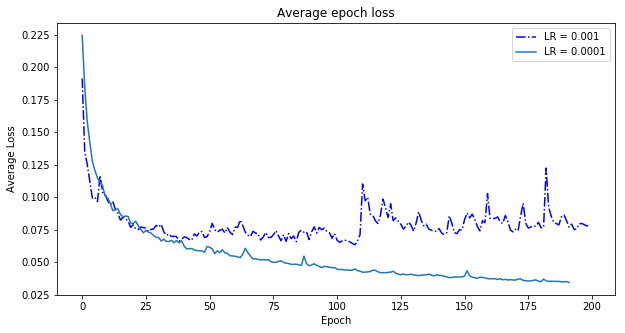

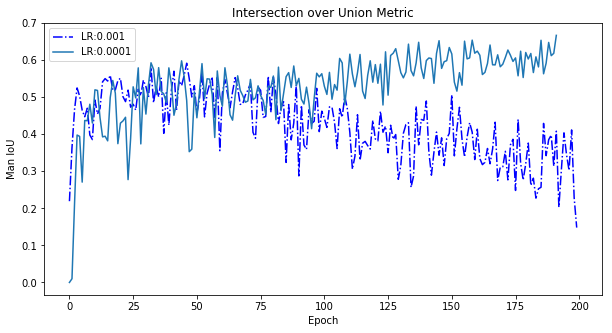

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 5)

plt.title("Average epoch loss")
plt.plot(training_loss_init,'b-.',label='LR = 0.001')
plt.plot(training_loss_final,label='LR = 0.0001')
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.legend()
plt.show()

plt.title("Intersection over Union Metric")
plt.plot(val_aucc_init,'b-.',label='LR:0.001')
plt.plot(val_aucc_final,label='LR:0.0001')
plt.xlabel("Epoch")
plt.ylabel("Man IoU")
plt.legend()
plt.show()

In [23]:
#Evaluate model 
def predict(images,masks,batch=20):
    segnet.eval()
    
 
    mean_precision = 0
    for threshold in [.5]:
        j_coeff = 0.0
        for idx, image in enumerate(val_f_images):
#             print(idx)
            image = image.type(torch.FloatTensor)
#             print(image.view(1,1,image.shape[1],image.shape[2]))
            if args.cuda:
                image = Variable(image.view(batch,1,image.shape[1],image.shape[2]).cuda())
            else:
                image = Variable(image.view(batch,1,image.shape[1],image.shape[2]))

            #print('Validation Image Shape:',validation_image.shape)

            vout = segnet(image)
            
            vout.ge_(threshold).float()
            
        
            j_coeff += jaccard_coeff(vout.cpu().data[0].numpy(),val_f_masks[idx].numpy())

            
        print('Average J-Coeff at %.2f : %.4f' % ( threshold ,j_coeff/len(val_f_images)))

In [27]:
predict(val_img_torch,val_mask_torch,batch=1)

Average J-Coeff at 0.50 : 0.6812


	Input image 	    Ground Truth Mask


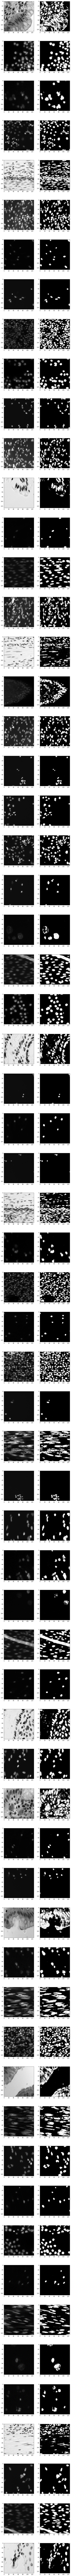

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 400)
plt_idx=0
print("\tInput image \t    Ground Truth Mask")
image_indexes=[0,30,10,20,3,5,8,14]
lpthreshold = 0.15
for idx,image in enumerate(test_data):
    
    plt.subplot(len(test_data),2,(idx*2)+1)
    image = test_data[idx]/255.
    
    image = np.asarray(image*255.,dtype='int32')
    plt.imshow(Image.fromarray(image))
    
    
    
    plt.subplot(len(test_data),2,(idx*2)+2)
    
    ip_img = test_data[idx]
    if negativeThreshold(ip_img) > lpthreshold:
        ip_img = 255 - ip_img
    ip_image = torch.from_numpy(ip_img/255.)
    ip_image = ip_image.type(torch.FloatTensor)
    
    if args.cuda:
        ip_image = Variable(ip_image.view(1,1,ip_image.shape[0],ip_image.shape[1]).cuda())
    else:
        ip_image = Variable(ip_image.view(1,1,ip_image.shape[0],ip_image.shape[1]))
    
    predicted_mask = segnet(ip_image).data[0][0].cpu().numpy()
    predicted_mask = np.asarray(predicted_mask*255.,dtype='int32')
    plt.imshow(Image.fromarray(predicted_mask))
    plt_idx +=2
